# Creating Interactive and Static Charts with Plotly [Work in progress]

By Kenneth Burchfiel
Released under the MIT License

In this section, we'll learn how to use the Plotly library to create bar, line, and scatter plots. We'll then save these charts to both interactive HTML files and static .png files.

In [1]:
import pandas as pd
import plotly.express as px

## Reading in data

We'll start by reading in data from the pivot table that we created within the Spreadsheet Operations section of Python for Nonprofits. This table contains both enrollment and test result data at the school/grade level.

In [50]:
df_school_grade_pivot = pd.read_csv(
    '../data/test_results_by_school_and_grade.csv').sort_values(
    ['School', 'Grade_for_Sorting']).reset_index(drop=True) # Sorting 
# the data by school and grade will make it easier to display these values in alphabetical 
# order within some of our charts.
df_school_grade_pivot.head(5)

,School,Grade_for_Sorting,Grade,Students,Underenrolled,Enrollment_Category,Stage,Fall_Test_Results,Spring_Test_Results,School/Grade,Fall_to_Spring_Test_Growth
0,Chestnut,0,K,90,0,Overenrolled,ES,49.244444,58.033333,Chestnut K,8.788889
1,Chestnut,1,1,71,0,Normal,ES,49.450704,59.084507,Chestnut 1,9.633803
2,Chestnut,2,2,76,0,Normal,ES,51.197368,56.368421,Chestnut 2,5.171053
3,Chestnut,3,3,61,1,Underenrolled,ES,47.819672,59.475410,Chestnut 3,11.655738
4,Chestnut,4,4,85,0,Overenrolled,ES,49.741176,55.988235,Chestnut 4,6.247059


# Creating Bar Graphs

df_school_grade_pivot shows enrollment data by both school and grade. In order to determine our schoolwide enrollment counts, we can use Plotly Express's [histogram()](https://plotly.com/python/histograms/) function to sum up all enrollment totals at each school. 

In the following line of code, the first argument (df_school_grade_pivot) is our data source, and the 'x' and 'y' arguments are both columns within that DataFrame.

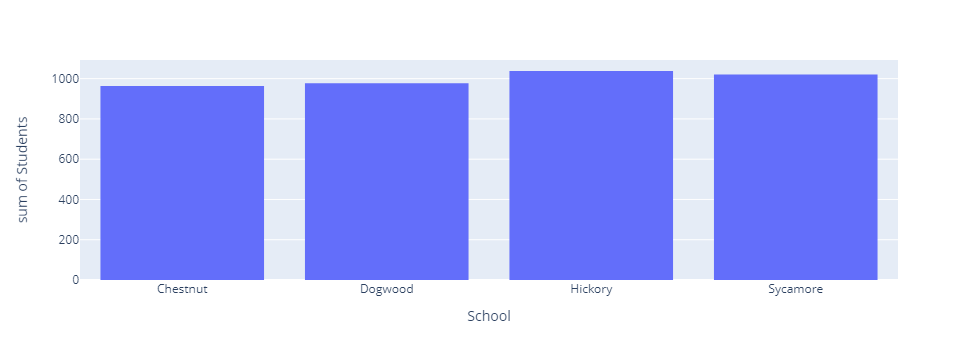

In [27]:
px.histogram(df_school_grade_pivot, x = 'School', y = 'Students')
# The following line, which passes just two arguments 
# (one Pandas Series for 'x' and another for 'y'), 
# would produce an equivalent chart:
# px.histogram(x = df_school_grade_pivot['School'], y = df_school_grade_pivot['Students'])

Note that this chart is interactive by default: hovering over any bar will show you the exact number of students enrolled at its corresponding school. You can also access various tools when hovering over the top right of the output.

Why did we call Plotly's histogram() function rather than bar()? As the Plotly documentation notes, "with px.bar, each row of the DataFrame is represented as a rectangular mark." As a result, since each school has 12 grades, we'd then end up with 12 rectangles per bar, as shown below:

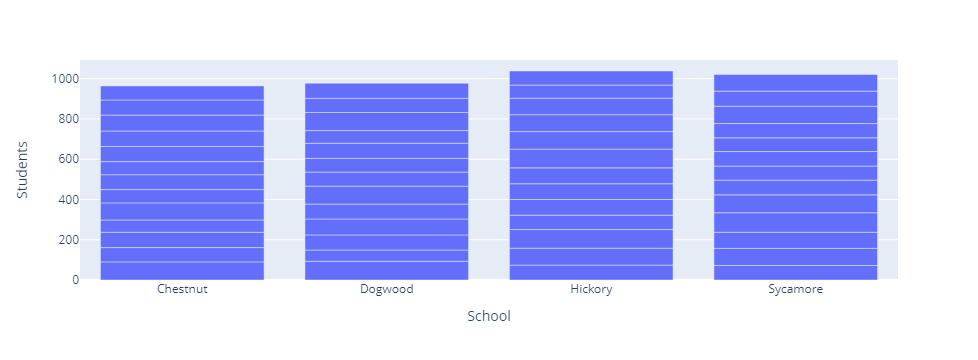

In [28]:
px.bar(df_school_grade_pivot, 
       x = 'School', y = 'Students') # note that each grade is represented by
# its own bar.

We'll now improve the output of this chart by adding in a title; assigning different colors to each school; changing the y axis title; and adding labels to our data. These additions were based on code samples within [this Plotly documentation page](https://plotly.com/python/figure-labels/).

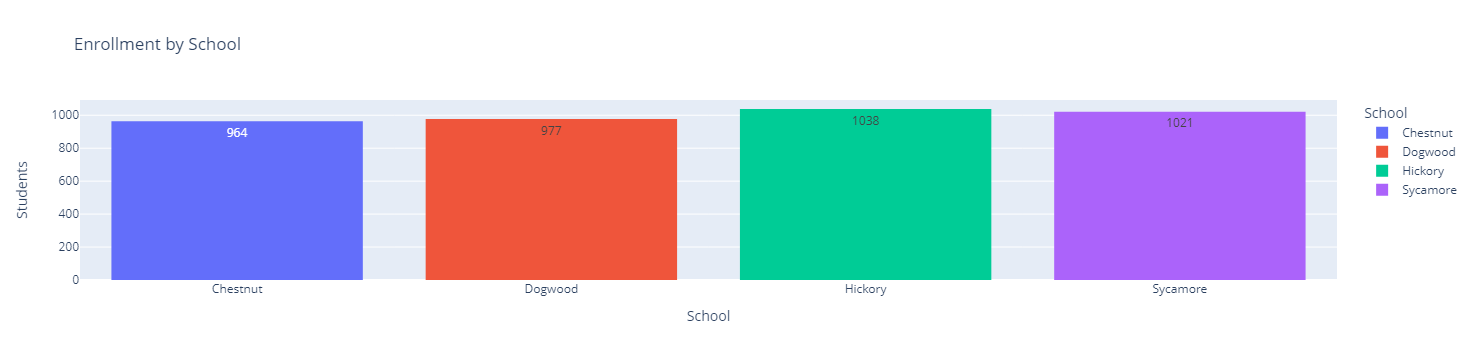

In [53]:
fig_school_enrollment = px.histogram(
    df_school_grade_pivot, x = 'School', y = 'Students', 
    title = 'Enrollment by School', text_auto = True,
    color = 'School')

fig_school_enrollment.update_layout(yaxis_title = 'Students')
# As you might have guessed, x axis titles can be modified by setting
# xaxis_title to your desired title.

fig_school_enrollment

We can now save both an interactive HTML version of this chart along with a static PNG one. Charts as simple as this one don't really benefit from interactivity (as each bar's data label already shows its corresponding tooltip information), but the HTML version can still appear sharper on high-resolution monitors.

In [57]:
fig_school_enrollment.write_html('Graphs/enrollment_by_school.html') 
# I could have named this file 'school_enrollment' instead, but
# leading with 'enrollment' will allow all enrollment charts to get
# grouped together, thus making them easier to locate within
# our 'Graphs' folder.

# When calling write_image() to save static copies of charts, I recommend 
# setting scale to a higher number (e.g. 4) in order to arrive
# at a higher-quality image. Setting the width and height, though optional,
# allows you more contral over the final shape of your chart. In this case,
# I set the width and height values so that the final result would be 3840 by
# 2160 pixels (equivalent to a UHD/4K video). This 16:9 aspect ratio
# is the same one found on many monitors and TVs, thus making full screen
# charts easier to display.)
fig_school_enrollment.write_image('Graphs/enrollment_by_school.png', 
                                     scale = 4, width = '960', height = '540') 


Instead of calling these two lines of code each time we need to save a chart, I'll instead create a save_chart() function that can perform these same two operations. This function can help guard against errors when saving files, as it would be easy to forget to change the DataFrame or filename values for both write_html() and write_image() if we kept calling those two items separately.

In [59]:
def save_chart(chart, filename, image_scale = 4,
              image_width = 960,
              image_height = 540):
    '''This function saves charts as both HTML and PNG files.
    Chart: the Plotly figure to be saved.
    filename: the name of the file. Don't include the HTML or PNG 
    extensions, as the function will add these in automatically.
    image_scale, image_width, image_height: the values to pass
    to the scale, width, and height arguments of write_image.'''
    chart.write_html(
        f'Graphs/{filename}.html')
    chart.write_image(
        f'Graphs/{filename}.png', 
        scale = 4, width = '960', height = '540') 


# Graphing multiple variables via a bar chart:

In order to show enrollment by school and grade, we can call px.bar() to create a bar chart in which schools and student counts are the x and y variables, respectively. This chart will *also* add in student grades as the 'color' argument so that we can see individual enrollment counts at the school/grade level. 

The 'barmode' parameter lets us specify how we want the individual grade bars to be displayed. 'group', the parameter used below, shows these bars side by side. However, 

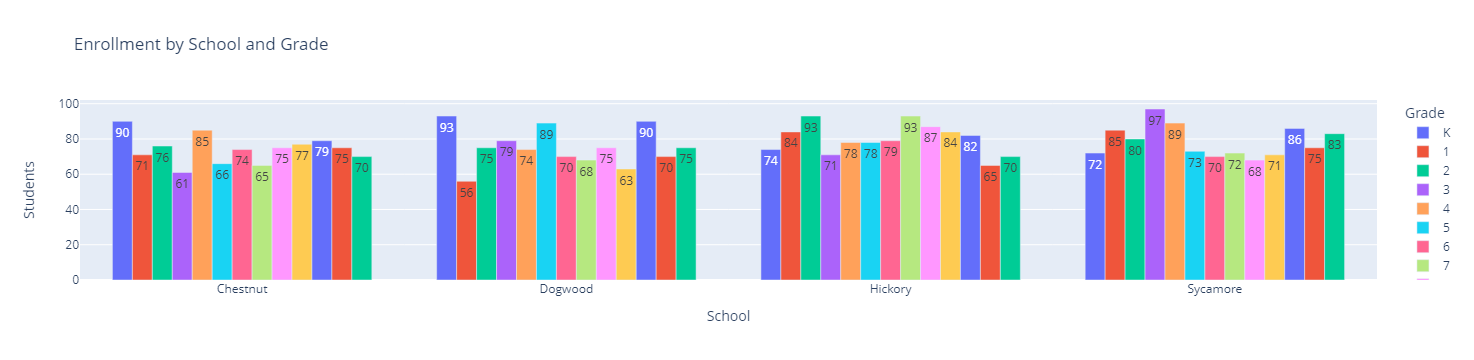

In [60]:
fig_school_grade_enrollment = px.bar(
    df_school_grade_pivot, 
    x = 'School', y = 'Students', color = 'Grade', 
       barmode = 'group', text_auto = True,
        title = 'Enrollment by School and Grade')

# Because we called px.bar() rather than px.histogram(),
# the y axis title is equal to our y axis value ('Students')
# by default. Therefore, unlike with the histogram we created
# earlier, there's no need to rename this title.

save_chart(fig_school_grade_enrollment, 'enrollment_by_school_and_grade')

fig_school_grade_enrollment

Setting 'barmode' to 'relative' stacks each grade bar atop one another:

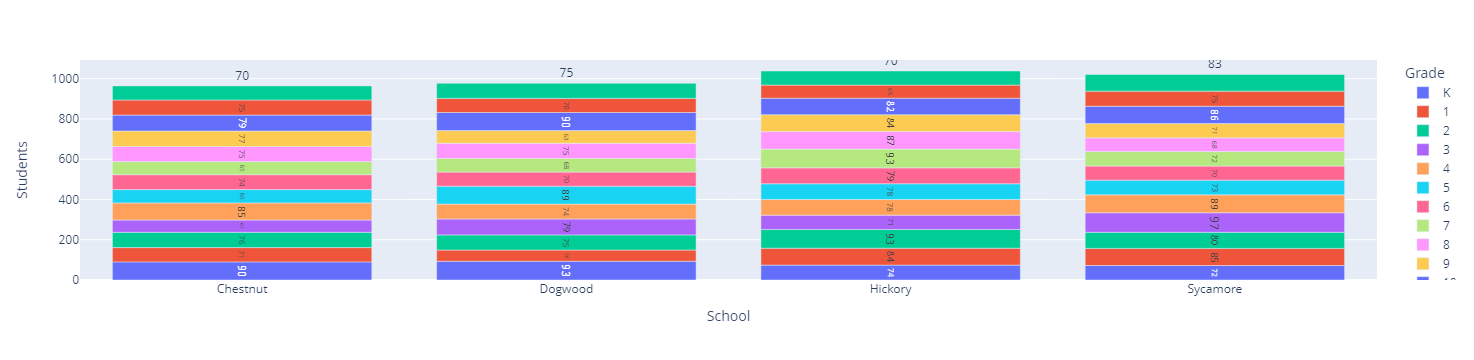

In [48]:
px.bar(df_school_grade_pivot, x = 'School', y = 'Students', color = 'Grade', 
       barmode = 'relative', text_auto = True)

# Here with editing

Other items to include:

* Line charts (you could use fall-to-spring test result data for this)
* Scatter plots (potentially including best fit lines)
* (Maybe) Tree maps as an alternative to pie charts
* Explanation of which Kaleido library to install in order for the code to work on Windows
* How to re-sort entries
* Custom color coding for bars via dictionaries
* Different color scales
* Adding in a third level of detail for bar charts via shading
* Hosting these charts on a Google Sites page (you could probably just embed them all within the same chart; explain that this approach would be static)
* A note about how we can use Dash and Plotly together to create interactive web apps that *can* get updated automatically
* Discussion of how this Python-based approach will make the charts easier to update automatically
* Changing time values from Plotly's default to categorical items so that they won't get blended together